# **Classification Analysis**


## **A. Implementation of Support Vector Machines (SVM) for classifying images of hand-written digits into their respective numerical classes (0 to 9).**

---

### Step 1: Understanding the Problem and Dataset
Before diving into any implementation, it's essential to understand the dataset and problem scope.

**_Dataset:_** We'll use the popular Digits dataset from sklearn, which contains images of digits (0 to 9) represented as 8x8 pixel arrays.

**_Goal:_** The aim is to classify each image into one of the 10 digit classes (0-9) using SVM.

**_Why SVM?_**

Support Vector Machines are powerful for classification problems, especially when dealing with high-dimensional data (like pixel data in images). SVM tries to find the best decision boundary (hyperplane) that separates the classes.

---

### Step 2: Data Exploration
We will load the dataset, explore its shape, check the images and their corresponding labels, and get an understanding of how many classes and samples we are dealing with.

---

Dataset shape: (1797, 8, 8)
Number of samples: 1797
Number of features per sample: 64
Target labels (digits): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


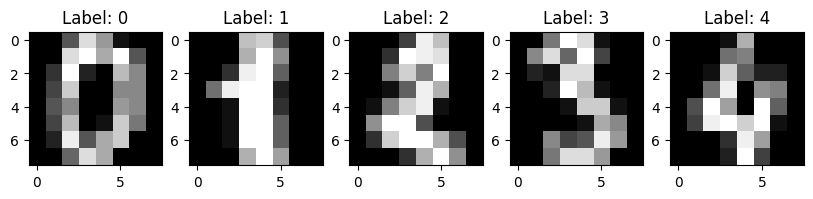

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Inspect the dataset
print(f"Dataset shape: {digits.images.shape}")
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features per sample: {digits.data.shape[1]}")
print(f"Target labels (digits): {set(digits.target)}")

# Display a few images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
plt.show()


---

**Key Observations:**

- The dataset contains 1,797 samples of digit images, each of size 8x8 pixels (64 features).
- Each image is labeled with one of 10 possible digit labels (0-9).
- Each pixel has an intensity value (ranging from 0 to 16, representing grayscale intensity).

---

### Step 3: Data Preprocessing

Since the pixel intensity values range from 0 to 16, we need to normalize the features (pixel values) to bring them into a range that is more suitable for SVM (commonly between 0 and 1).

We'll also split the data into training and testing sets for model evaluation.

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Flatten the images for input to the SVM model
X = digits.data  # Shape: (1797, 64) - each sample has 64 pixel features
y = digits.target  # Shape: (1797,) - target labels (digits 0-9)

# Normalize the pixel values to a range of 0 to 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Check the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1347, 64)
Test set shape: (450, 64)


---

**Why Standardize the Pixel Values?**

SVMs are sensitive to the scale of the input data. By normalizing pixel values, we ensure that all pixels contribute equally to the decision boundary and prevent large values from dominating the model's performance.

---

### Step 4: Choosing the SVM Kernel
The SVM algorithm allows us to use different kernels for mapping non-linear relationships in data:

**Linear Kernel:** Used when the data is linearly separable.

**RBF (Radial Basis Function) Kernel:** Works well for non-linear data by adding a Gaussian transformation to the data points.

We'll experiment with both linear and RBF kernels and see which one performs better on this dataset.

**Why Start with Linear Kernel?**

Since our data has relatively high dimensionality (64 features), linear SVM can be a good first option. If we notice that the linear model is underperforming, we'll try a more flexible non-linear kernel.

---

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM model with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)

# Evaluate the model performance
print("\nLinear Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")
print(classification_report(y_test, y_pred_linear))



Linear Kernel SVM Performance:
Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Step 5: Non-Linear SVM with RBF Kernel
Now, let’s switch to the RBF Kernel to account for potential non-linear relationships between the pixel values and digit labels.

---

In [ ]:
# Train the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model performance
print("\nRBF Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rbf))



RBF Kernel SVM Performance:
Accuracy: 98.44%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       0.98      1.00      0.99        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.98      0.94      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



---

**Why Use the RBF Kernel?**

The RBF kernel maps the input space into a higher-dimensional feature space, where it is easier to find a linear separation between the classes. This is useful for data that isn't linearly separable.

---

### Step 7: Hyperparameter Tuning (Optional)
To optimize the performance of the SVM model, we can apply grid search to find the best combination of C and gamma for the RBF kernel.

---

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 'auto'],
    'kernel': ['rbf']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"\nBest parameters from Grid Search: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_ * 100:.2f}%")

# Use the best estimator to predict
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Final evaluation
print("\nBest RBF Kernel SVM Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(classification_report(y_test, y_pred_best))



Best parameters from Grid Search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 98.00%

Best RBF Kernel SVM Performance after Hyperparameter Tuning:
Accuracy: 98.22%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### **Conclusion:**

Linear SVM offers a strong, fast baseline performance that is close to 98%, which is excellent given that it operates in a lower-dimensional feature space without mapping to non-linear regions.

RBF Kernel SVM slightly improves performance and provides flexibility in capturing non-linear relationships. It's the more appropriate choice for this task when aiming for the best accuracy, especially after tuning.

These results demonstrate the strength of SVM for image classification, and further improvements could be explored through techniques like feature extraction or dimensionality reduction (e.g., PCA), though the performance is already very strong.

## **B. Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.**
Dataset link:https://www.kaggle.com/datasets/rakeshrau/social-network-ads

### Step 1: Understanding the Problem

The goal is to use the Social Network Ads dataset to classify whether a user purchases a product based on their age and salary, using the K-Nearest Neighbors (KNN) algorithm. Our evaluation metrics will include the confusion matrix, accuracy, error rate, precision, and recall.

**Why KNN?**

KNN is a simple, non-parametric algorithm that classifies new data points based on similarity (distance) to its neighbors. It's ideal for this classification problem because we have relatively few features (age and salary), and we want to categorize users into one of two classes (Purchased: 0 or 1).

---

### Step 2: Data Exploration and Initial Inspection
First, let’s load the dataset and explore it to check for any anomalies, missing data, or outliers.

---

In [ ]:
import pandas as pd

# Load dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# View basic details
print("Dataset Info:")
print(dataset.info())
print("\nFirst few rows of the dataset:")
print(dataset.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

First few rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


---

**Dataset Observations:**

_Features:_

1. `User ID`: Doesn't seem useful for prediction; we can ignore it as it's a unique identifier.
2. `Gender`: Might be interesting, but converting it into numerical form (0 for male, 1 for female) could be useful if we decide to include it.
3. `Age`: Definitely a key factor in predicting purchase behavior.
4. `EstimatedSalary`: Another key factor, as a higher salary could correlate with higher purchasing power.
5. `Purchased`: This is our target variable, where 1 indicates the person made a purchase and 0 indicates they didn't.

_Data Shape and Missing Values:_

The dataset contains 400 rows and 5 columns. From the output of dataset.info(), there are no missing valuess.

---

### Step 3: Data Cleaning and Preprocessing
Let's focus on the relevant columns (`Age`, `EstimatedSalary`, and `Purchased`) and check for any missing or erroneous data, like zero or negative values in `Age` or `EstimatedSalary`.

---

In [ ]:
# Drop the 'User ID' column as it's not useful for our analysis
dataset_cleaned = dataset.drop(['User ID'], axis=1)

In [ ]:
# Describe the dataset to check for any strange values
print("\nSummary Statistics:")
print(dataset_cleaned.describe())


Summary Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


### Step 4: Analyzing and Handling Outliers
To further inspect for outliers, we'll visualize the `Age` and `EstimatedSalary` features using boxplots and histograms.

---

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


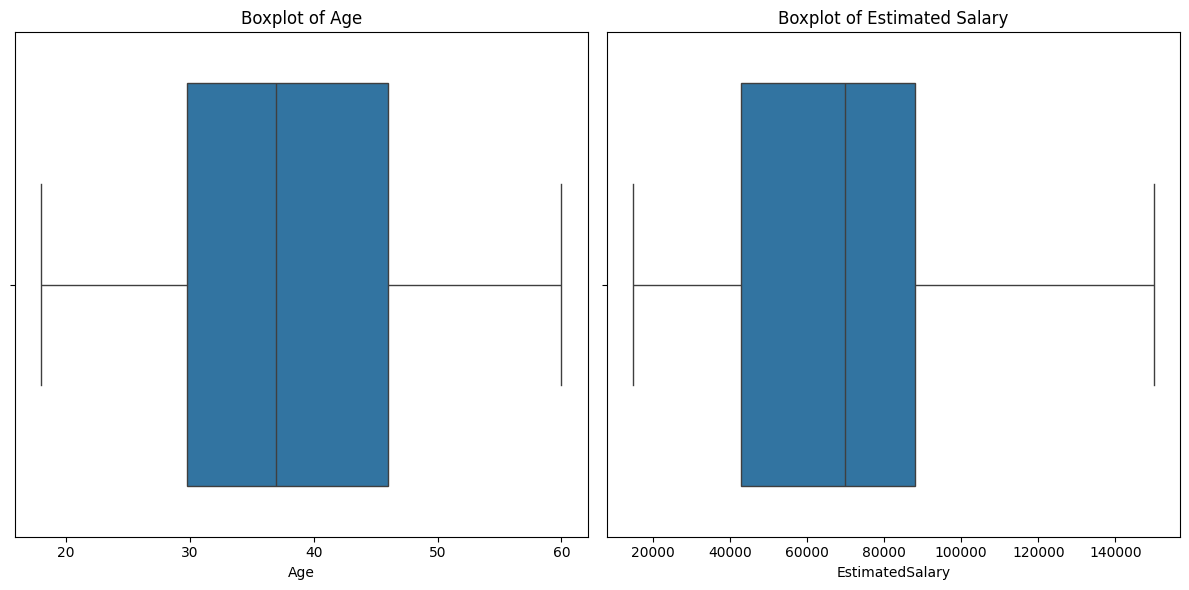

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Age and EstimatedSalary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_cleaned, x='Age')
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_cleaned, x='EstimatedSalary')
plt.title('Boxplot of Estimated Salary')

plt.tight_layout()
plt.show()


---

**Observations:**

Everything looks reasonable, we move forward.

---

### Step 5: Feature Scaling

KNN is a distance-based algorithm, meaning that the scale of features directly impacts its performance. Since Age and EstimatedSalary are on different scales, we need to apply feature scaling (standardization).

**Why Standardization?:**

Standardization ensures that each feature contributes equally to the distance calculation, preventing one feature (like salary) from dominating due to its large scale.

---

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assume 'Gender' is the column with 'Male' and 'Female'

# Load your dataset
dataset_cleaned = dataset.copy()  # Assuming the dataset is pre-cleaned and loaded as 'dataset'

# Step 1: Encoding categorical 'Gender' column
label_encoder = LabelEncoder()
dataset_cleaned['Gender'] = label_encoder.fit_transform(dataset_cleaned['Gender'])

# Step 2: Separating the features and target
X = dataset_cleaned.iloc[:, :-1].values   # Features (all columns except the last one)
y = dataset_cleaned.iloc[:, -1].values    # Target: Purchased

# Step 3: Scaling the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 5 rows of the scaled data
print(X_scaled[:5])


[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 [-1.23369247 -0.98019606 -1.01769239 -0.37418169]
 [ 1.57138881  1.02020406 -1.78179743  0.18375059]]


---

**Observations:**

Scaling will transform both `Age` and `EstimatedSalary` to a common scale (mean = 0, standard deviation = 1).

This ensures that the Euclidean distance used in KNN is not biased towards larger feature values.

---

### Step 6: Choosing K in KNN
**How to choose the number of neighbors (K)?**

There is no fixed rule for choosing K, but typical approaches involve cross-validation to find the K that minimizes the error rate.

A small K (e.g., K=1) can lead to overfitting, while a large K (e.g., K=20) can underfit. We’ll start with K=5, a commonly used default value, and then tune it later using cross-validation.

---

### Step 7: Train/Test Split
We split the dataset into training and testing sets to evaluate our model.

---

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Check the shapes to ensure proper split
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



Training set size: 300
Test set size: 100


---

**Why 25% test size?**

A 75-25 split is common in classification problems. The larger portion is used for training to ensure the model learns well, and 25% is held back for testing.

---

### Step 8: Implementing KNN
Now we implement the KNN classifier with K=5, but later we’ll test other K values to find the best fit.

---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier with K=5
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)


---

**Why Euclidean Distance (p=2)?**

In `KNeighborsClassifier`, the Minkowski distance is a generalization of both Manhattan and Euclidean distances. Setting `p=2` specifies Euclidean distance, which is typically the best choice for continuous variables like `Age` and `EstimatedSalary`.

---

### Step 9: Model Evaluation
We will evaluate the model using various metrics: confusion matrix, accuracy, error rate, precision, and recall.

---

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Confusion Matrix:
[[60  3]
 [ 5 32]]

Accuracy: 92.00%
Error Rate: 8.00%
Precision: 0.91
Recall: 0.86


---

**Observations:**

- **Confusion Matrix:** Shows the number of True Positives, True Negatives, False Positives, and False Negatives.
- **Accuracy**: The percentage of correct predictions.
- **Error Rate:** The percentage of incorrect predictions.
- **Precision**: How many predicted positives are actually positive.
- **Recall**: How many actual positives were predicted correctly.

---

### Step 10: Conclusion and Next Steps
- **Exploration of K:** We can further optimize by exploring different K values using cross-validation and picking the one that minimizes the error rate.
- **Feature Engineering:** We could include the Gender feature if it provides more value or explore other combinations of features.
- **Advanced Models:** We could compare KNN with other models like logistic regression, decision trees, or SVM to see which works best for this classification problem.

---